In [1]:
#회귀분석은 추론한것과 정답과 얼마나 차이가 나는지
#분류나 회귀등 영역에 따라 평가지표가 달라짐


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

In [3]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [5]:
digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [6]:
X=digits.data
y=digits.target
X.shape, y.shape

((1797, 64), (1797,))

In [7]:
np.unique(y, return_counts=True) #(고유값을 가진 배열, 개수) #개수 출력

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64))

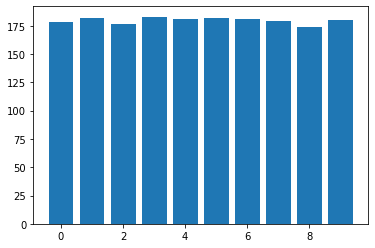

In [8]:
#plt.bar(x값 배열, y값 배열)
plt.bar(np.unique(y, return_counts=True)[0], np.unique(y, return_counts=True)[1])
plt.show()

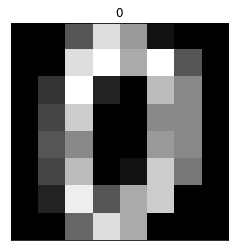

In [9]:
img_idx = 0
#이미지를 보기위해 2차원으로 변환
img = X[img_idx].reshape(8,8)
plt.imshow(img, cmap='gray')

plt.title(y[img_idx])
plt.xticks([])
plt.yticks([])
plt.show()

In [10]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [11]:
#조건에 맞는 것만 1반환
np.where(y==9,1,0)

array([0, 0, 0, ..., 0, 1, 0])

In [12]:
#조건을 만족하는 값만 출력
np.where(y==9)

(array([   9,   19,   29,   31,   37,   39,   69,   73,   92,  105,  119,
         125,  128,  139,  149,  159,  161,  167,  169,  199,  203,  220,
         233,  251,  254,  265,  275,  285,  287,  293,  295,  325,  329,
         348,  361,  375,  381,  384,  395,  405,  415,  417,  423,  425,
         455,  459,  478,  491,  505,  511,  514,  525,  535,  545,  547,
         553,  555,  585,  589,  608,  621,  635,  641,  644,  655,  665,
         675,  677,  683,  685,  715,  719,  738,  751,  765,  771,  774,
         785,  795,  805,  807,  813,  815,  845,  849,  868,  881,  895,
         901,  904,  914,  924,  934,  936,  942,  944,  971,  975,  993,
        1006, 1020, 1024, 1027, 1038, 1048, 1058, 1060, 1066, 1068, 1096,
        1100, 1119, 1132, 1146, 1152, 1155, 1166, 1176, 1186, 1188, 1194,
        1196, 1226, 1230, 1249, 1262, 1276, 1282, 1285, 1296, 1306, 1316,
        1318, 1324, 1326, 1356, 1360, 1379, 1392, 1406, 1412, 1424, 1434,
        1444, 1446, 1452, 1454, 1484, 

In [13]:
#불균형 데이터 만들기
y= np.where(y==9,1,0)

In [14]:
#각 결과는 array로 반환
y_pct = np.unique(y, return_counts=True)
y_pct

(array([0, 1]), array([1617,  180], dtype=int64))

In [15]:
#y.size는 len(y)와 동일

In [16]:
y_pct[1]/y.size
#음성은 검출을 잘하나
#양성은 잘 검출하지 못하므로 성능이 좋지 못함

array([0.89983306, 0.10016694])

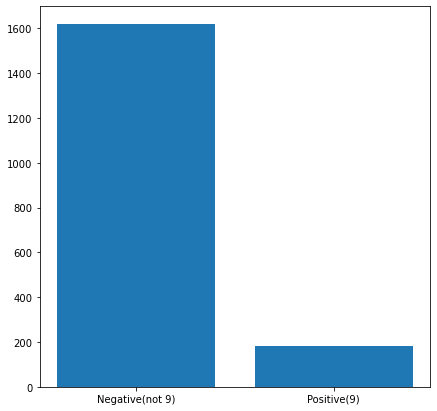

In [17]:
plt.figure(figsize=(7,7))
plt.bar(y_pct[0], y_pct[1])
plt.xticks([0,1], labels=['Negative(not 9)', 'Positive(9)'])
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,  random_state=0)

print(np.unique(y_train, return_counts=True)[1]/y_train.size)
print(np.unique(y_test, return_counts=True)[1]/y_test.size)

[0.89977728 0.10022272]
[0.9 0.1]


In [19]:
import pandas as pd
import numpy as np

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

In [20]:
#dummy = 목업같은 것
#y값 중 빈도수가 제일 높은 class로 예측
dummy_model = DummyClassifier(strategy='most_frequent') 


dummy_model.fit(X_train, y_train)

pred_train_dummy = dummy_model.predict(X_train)
pred_test_dummy = dummy_model.predict(X_test)

train_acc = accuracy_score(y_train, pred_train_dummy)
test_acc = accuracy_score(y_test, pred_test_dummy)
print(f"훈련데이터 정확도 {train_acc}, 테스트데이터 정확도: {test_acc}") 
#위와 동일한 결과

훈련데이터 정확도 0.8997772828507795, 테스트데이터 정확도: 0.9


In [21]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

# TODO 머신 모델을 이용해 학습
- DecisionTreeClassifier 사용(max_depth=3)
- 모델생성
- 학습(train)
- 평가(train/test)
    - accuracy, recall, precision, f1 score, confusion_matrix 확인

In [22]:
import pandas as pd
import numpy as np

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

In [23]:
#dummy
dummy_model = DummyClassifier(strategy='most_frequent')

dummy_model.fit(X_train, y_train)

pred_train_dummy = dummy_model.predict(X_train)
pred_test_dummy = dummy_model.predict(X_test)

train_acc = accuracy_score(y_train, pred_train_dummy)
test_acc = accuracy_score(y_test, pred_test_dummy)
print(f"훈련데이터 정확도 {train_acc}, 테스트데이터 정확도: {test_acc}") 
#비록 정확도는 90%(0.9) 이지만 10%(0.1)의 9는 아예 분류하지 못한다. 
#찾으려는 대상(positive)이 9일 경우 하나도 분류해 내지 못하는 모델이 된다.

훈련데이터 정확도 0.8997772828507795, 테스트데이터 정확도: 0.9


In [24]:
#혼동행렬
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

# 각 평가 지표 계산 함수
- sklearn.metrics 모듈
- numpy 배열로 반환
- plot_confusion_matrix() 표 그리기
- **confusion_matrix(y 실제값, y 예측값)/plot_confusion_matrix()**
    - 혼돈 행렬 반환
- **recall_score(y 실제값, y 예측값)**
  - Recall(재현율) 점수 반환 (Positive 중 Positive로 예측한 비율 (TPR))
- **precision_score(y 실제값, y 예측값)**
  - Precision(정밀도) 점수 반환 (Positive로 예측한 것 중 Positive인 것의 비율 (PPV))
- **f1_score(y 실제값, y 예측값)**
    - F1 점수 반환 (recall과 precision의 조화 평균값)
- **classification_report(y 실제값, y 예측값)**
    - 클래스 별로 recall, precision, f1 점수와 accuracy를 종합해서 보여준다.

In [25]:
print('Train confusion matrix')
print(confusion_matrix(y_train, pred_train_dummy))
print("-"*50)
print('Test confusion matrix')
print(confusion_matrix(y_test, pred_test_dummy))

Train confusion matrix
[[1212    0]
 [ 135    0]]
--------------------------------------------------
Test confusion matrix
[[405   0]
 [ 45   0]]


C:\Users\user\anaconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


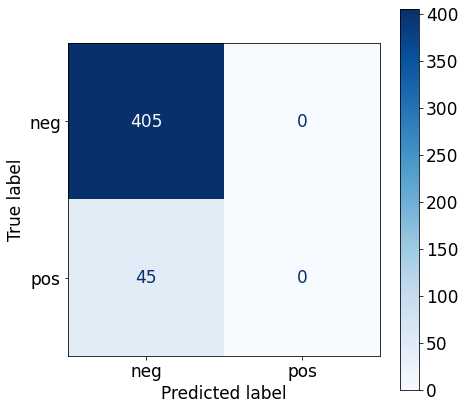

In [26]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib as mpl
mpl.rcParams['font.size']=17
_, ax = plt.subplots(1,1,figsize=(7,7))

#sklearn
plot_confusion_matrix(dummy_model,
                     X_test,
                     y_test,
                     display_labels=['neg', 'pos'],
                     cmap=plt.cm.Blues,
                     values_format='d',
                     ax=ax)

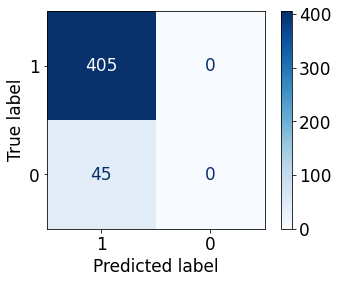

In [27]:
#confusion_matrix 값을 주고 바로 그래프 그리기
from sklearn.metrics import ConfusionMatrixDisplay

cm=confusion_matrix(y_test, pred_test_dummy)

disp=ConfusionMatrixDisplay(cm,
                           display_labels=['1', '0'])
disp.plot(cmap='Blues')

In [28]:
print("Accuracy")
accuracy_score(y_train,pred_train_dummy), accuracy_score(y_test, pred_test_dummy)

Accuracy


(0.8997772828507795, 0.9)

In [29]:
print("Recall") 
recall_score(y_train, pred_train_dummy), recall_score(y_test, pred_test_dummy)
#0이 나왔다는건 positive로 맞춘게 하나도 없다는 것

Recall


(0.0, 0.0)

In [30]:
print('Precision')
precision_score(y_train, pred_train_dummy), precision_score(y_test, pred_test_dummy)
#0이 나왔다는건 0이라고 예측한것 중 맞춘게 하나도 없다는 것

Precision


C:\Users\user\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.0, 0.0)

In [31]:
print('f1 score')
f1_score(y_train, pred_train_dummy), f1_score(y_test, pred_test_dummy)


f1 score


(0.0, 0.0)

# 개인) 머신 모델을 이용해 학습

### TODO 머신 모델을 이용해 학습
- DecisionTreeClassifier 사용(max_depth=3)
- 모델생성
- 학습(train)
- 평가(train/test)
    - accuracy, recall, precision, f1 score, confusion_matrix 확인

In [32]:
#더미모델 사용

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

dummy_model = DecisionTreeClassifier(max_depth=3, random_state=0)
dummy_model.fit(X_train, y_train)

pred_train_dummy = dummy_model.predict(X_train)
pred_test_dummy = dummy_model.predict(X_test)

train_acc = accuracy_score(y_train, pred_train_dummy)
test_acc = accuracy_score(y_test, pred_test_dummy)

print(train_acc)
print(test_acc)
#accuracy_

0.9465478841870824
0.9511111111111111


In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
#실제y 예측y

In [34]:
print('accuracy_score#########################################')
print(accuracy_score(y_train, pred_train_dummy))
print(accuracy_score(y_test, pred_test_dummy))
print(' ')
print('recall_score#########################################')
print(recall_score(y_train, pred_train_dummy))
print(recall_score(y_test, pred_test_dummy))
print(' ')
print('precision_score#########################################')
print(precision_score(y_train, pred_train_dummy))
print(precision_score(y_test, pred_test_dummy))
print(' ')
print('f1_score#########################################')
print(f1_score(y_train, pred_train_dummy))
print(f1_score(y_test, pred_test_dummy))
print(' ')
print('confusion_matrix#########################################')
print(confusion_matrix(y_train, pred_train_dummy))
print(confusion_matrix(y_test, pred_test_dummy))

accuracy_score#########################################
0.9465478841870824
0.9511111111111111
 
recall_score#########################################
0.8
0.7555555555555555
 
precision_score#########################################
0.7058823529411765
0.7555555555555555
 
f1_score#########################################
0.7500000000000001
0.7555555555555555
 
confusion_matrix#########################################
[[1167   45]
 [  27  108]]
[[394  11]
 [ 11  34]]


#dummy로 실제 테스트 했을 때

#정확도: train과 test 셋을 기준으로 모두 정확도는 90퍼센트 이상으로 높게 나옴
#민감도(recall):train셋에 비해 test셋은 성능이 낮게 나옴
               >참이라고 예측한 것/실제 값이 참인것
#정밀도(precision):train셋에 비해 test셋은 성능이 낮게 나옴
                  >실제값이 참인것/참이라고 예측한 것
#f1_score:2*(민감도*정밀도)/(민감도+정밀도)

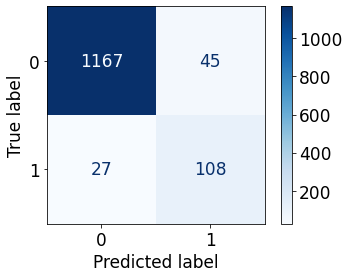

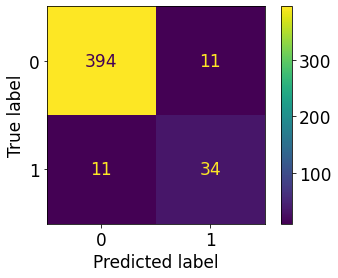

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
train_cm = confusion_matrix(y_train, pred_train_dummy)
test_cm = confusion_matrix(y_test, pred_test_dummy)
train_disp = ConfusionMatrixDisplay(train_cm, display_labels=['0','1'])
test_disp = ConfusionMatrixDisplay(test_cm, display_labels=['0', '1'])
train_disp.plot(cmap='Blues')
test_disp.plot()


# 강사님) 머신 모델을 이용해 학습

In [50]:
#강사님 버전 

In [51]:
from sklearn.tree import DecisionTreeClassifier
#앙상블 모델
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
f1_score, confusion_matrix, ConfusionMatrixDisplay

In [80]:
#모델생성
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
#n_estimators= DecisionTree를100 개를 만들라는 것
rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)


#학습
tree.fit(X_train, y_train)
rf.fit(X_train, y_train);
#리턴값 보기 싫을 때 ;를 맨 뒤에(단 주피터노트북에서만 가능)

#추론
pred_train_tree= tree.predict(X_train)
pred_test_tree = tree.predict(X_test)

pred_train_rf = rf.predict(X_train)
pred_test_rf= rf.predict(X_test)

In [93]:
#confusion matrix 
print('Tree : train set')
print(confusion_matrix(y_train, pred_train_tree))
print("-" * 30)
print(confusion_matrix(y_test, pred_test_tree))    
      


Tree : train set
[[1167   45]
 [  27  108]]
------------------------------
[[394  11]
 [ 11  34]]


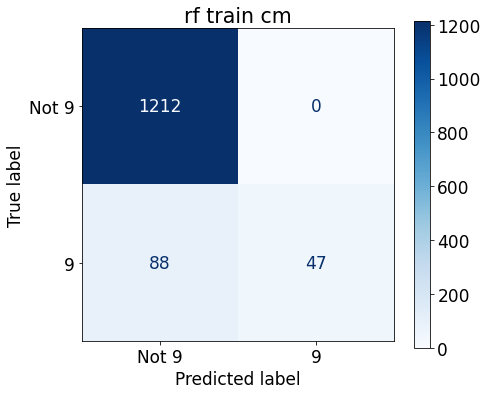

In [74]:
#test set
#print(confusion_matrix(y_train, pred_train_rf))
#그래프 크기 변경
#axis에 그림을 그리고 figure에 담는 것임
plt.figure(figsize=(7,6))
ax=plt.gca()

cm=confusion_matrix(y_train, pred_train_rf)
disp = ConfusionMatrixDisplay(cm, display_labels=['Not 9', '9'])
disp.plot(cmap='Blues', ax=ax)
plt.title('rf train cm')
plt.show()
#print(confusion_matrix(y_test, pred_train_rf))

In [81]:
def display(y, pred, title):
    """
    confusion matrix 시각화 함수
    [파라미터]
      y: ndarray - 정답(Ground Truth)
      pred:ndarray - 모델이 예측한 값
      title: str- 그래프의 제목
    [Return]
    [Exception]
    """
    plt.figure(figsize=(7,6))
    ax=plt.gca()

    cm=confusion_matrix(y, pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=['Not 9', '9'])
    disp.plot(cmap='Blues', ax=ax)
    plt.title(title)
    plt.show()

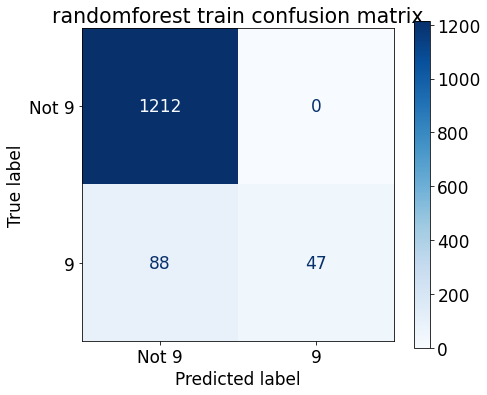

In [82]:
display(y_train, pred_train_rf, 'randomforest train confusion matrix')

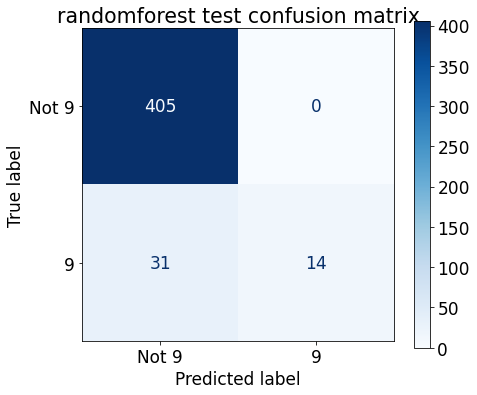

In [83]:
display(y_test, pred_test_rf, 'randomforest test confusion matrix')

In [85]:
#평가지표 출력
print('tree_train')
accuracy_score(y_train, pred_train_tree), recall_score(y_train, pred_train_tree)


tree_train


(0.9465478841870824, 0.8)

In [86]:
#평가지표  출력 함수
def print_metrics_classifier(y, pred, title):
    """
    accuracy, recall, precision, f1점수를 출력하는 함수
    [parameter]
      y: ndarray - 정답(Ground Truth)
      pred:ndarray - 모델이 예측한 값
      title:str - 제목
    [return]
    [exception]
    """
    print(title)
    print('정확도(accuracy): ', accuracy_score(y, pred))
    print('재현률(recall)', recall_score(y, pred))
    print('정밀도(precision):', precision_score(y, pred))
    print('f1 score:', f1_score(y, pred))

In [88]:
print_metrics_classifier(y_train, pred_train_tree, 'tree_train')

tree_train
정확도(accuracy):  0.9465478841870824
재현률(recall) 0.8
정밀도(precision): 0.7058823529411765
f1 score: 0.7500000000000001


In [89]:
print_metrics_classifier(y_test, pred_test_tree, 'tree_test')

tree_test
정확도(accuracy):  0.9511111111111111
재현률(recall) 0.7555555555555555
정밀도(precision): 0.7555555555555555
f1 score: 0.7555555555555555


In [91]:
print_metrics_classifier(y_train, pred_train_rf, 'rf_train')
#재현률로 보아 실제 9인건 35퍼 정도밖에 못맞춤

rf_train
정확도(accuracy):  0.9346696362286563
재현률(recall) 0.34814814814814815
정밀도(precision): 1.0
f1 score: 0.5164835164835165


In [90]:
print_metrics_classifier(y_test, pred_test_rf, 'rf_test')

rf_test
정확도(accuracy):  0.9311111111111111
재현률(recall) 0.3111111111111111
정밀도(precision): 1.0
f1 score: 0.4745762711864407


In [96]:
##임계값
from sklearn.metrics import precision_recall_curve
pos_proba = tree.predict_proba(X_test)[:,1] #(1)pos일 확률만 추출(450,2) / 1일 확률인 인덱스만 가져옴
precisions, recalls, thresholds = precision_recall_curve(y_test, pos_proba)
#threshold 마지막에 1이 생략됨. precision과 recall은 threshold 1일 때 결과를 가지고 있음.
print(precisions.shape, recalls.shape, thresholds.shape) 

(8,) (8,) (7,)


In [97]:
thresholds = np.append(thresholds, 1) #threshold 1을 추가
print(precisions.shape, recalls.shape, thresholds.shape) 

(8,) (8,) (8,)


In [99]:
import pandas as pd
pd.DataFrame({
    'threshold':thresholds,
    'precision':precisions,
    'recall':recalls
})

#임계값이 바뀌는 시점에 따라 precision과 recall 변화 확인
#threshold 가 1일 때 맞춘건 하나도 없으므로 recall(실제 pos값 대비 예측pos한)이 0

,threshold,precision,recall
0,0.008264,0.100000,1.000000
1,0.013043,0.107579,0.977778
2,0.033898,0.431818,0.844444
3,0.040000,0.513889,0.822222
4,0.149254,0.560606,0.822222
5,0.545455,0.755556,0.755556
6,0.750000,0.823529,0.622222
7,1.000000,1.000000,0.000000


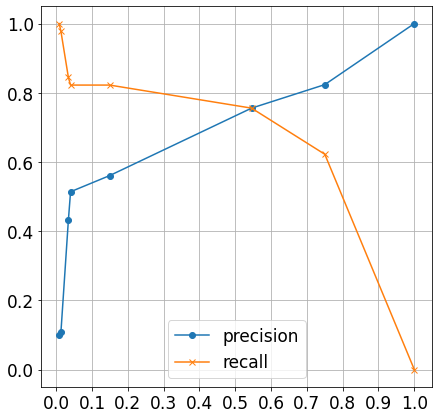

In [105]:
#plotting
plt.figure(figsize=(7,7))
plt.plot(thresholds, precisions, marker='o', label='precision') #y: precision
plt.plot(thresholds, recalls, marker='x', label='recall') #y:recall

plt.xticks(np.arange(0, 1.1, 0.1)) 
plt.grid(True)
#범례위치 조작
#plt.legend(loc='upper left', bbox_to_anchor=(1,1))
#plt.legend(loc='upper left', bbox_to_anchor=(1,0.6))
plt.legend()
plt.show()

### Binarizer - 임계값 변경
- Transformer로 설정한 임계점 보다 작으거나 같으면 0, 크면 1로 변환하는 변환기
- Binarizer를 이용해 원하는 임계값을 설정하여 양성/음성 분류기준을 변경할 수 있다.

In [109]:
from sklearn.preprocessing import Binarizer

In [110]:
exam = [[0.3, 0.7,0.4, 0.6]]

#binarizer = Binarizer(threshold=0.1) #0.1 이하는 0 초과는 1로 변환
#binarizer = Binarizer(threshold=0.5) #0.5 이하는 0 초과는 1로 변환
binarizer = Binarizer(threshold=0.7) #0.7이하는 0 초과는 1로 변환

binarizer.fit_transform(exam) 

array([[0., 0., 0., 0.]])

In [111]:
#true는 0으로 false는 1로
#이 방법은 반드시 numpy배열로 가능
exam = np.array(exam)
th=0.5
np.where(exam<=th, 0, 1)

array([[0, 1, 0, 1]])

In [113]:
binarizer1 = Binarizer(threshold=0.1)
binarizer2= Binarizer(threshold=0.4)
pred_proba = tree.predict_proba(X_test)

pred_test_tree2 = binarizer1.fit_transform(pred_proba)[:, 1]
pred_test_tree3 = binarizer2.fit_transform(pred_proba)[:, 1]

In [116]:
recall_score(y_test, pred_test_tree2), precision_score(y_test, pred_test_tree2)
recall_score(y_test, pred_test_tree2), precision_score(y_test, pred_test_tree3)

(0.8222222222222222, 0.5606060606060606)

In [118]:
print_metrics_classifier(y_test, pred_test_tree2, 'th 0.1')

th 0.1
정확도(accuracy):  0.9177777777777778
재현률(recall) 0.8222222222222222
정밀도(precision): 0.5606060606060606
f1 score: 0.6666666666666666


In [119]:
print_metrics_classifier(y_test, pred_test_tree3, 'th 0.4')

th 0.4
정확도(accuracy):  0.9511111111111111
재현률(recall) 0.7555555555555555
정밀도(precision): 0.7555555555555555
f1 score: 0.7555555555555555


In [121]:
#개인적으로 쳐보기
from sklearn.metrics import classification_report

result = classification_report(y_test, pred_test_rf, target_names=['other', '9'])
print(result)

              precision    recall  f1-score   support

       other       0.93      1.00      0.96       405
           9       1.00      0.31      0.47        45

    accuracy                           0.93       450
   macro avg       0.96      0.66      0.72       450
weighted avg       0.94      0.93      0.91       450



In [ ]:
#정밀도가 더 중요한 경우 
#정상메일을 스팸메일로 분류할 경우
#실제 neg를 pos로 잘못 판단하면 안되는 경우
#FP를 낮추는데 초점을 맞춤


In [131]:
tree.predict_proba(X_test)[:5]

array([[0.99173554, 0.00826446],
       [0.98695652, 0.01304348],
       [0.98695652, 0.01304348],
       [0.98695652, 0.01304348],
       [0.98695652, 0.01304348]])

In [132]:
rf.predict_proba(X_test)[:5]

array([[0.88798088, 0.11201912],
       [0.95586889, 0.04413111],
       [0.83626994, 0.16373006],
       [0.99095049, 0.00904951],
       [0.98509411, 0.01490589]])

In [142]:
from sklearn.metrics import precision_recall_curve

pos_proba = tree.predict_proba(X_test)[:, 1] 
 
#precision_recall
precisions, recalls, thresholds = precision_recall_curve(y_test, pos_proba)

precisions.shape, recalls.shape, thresholds.shape 

thresholds = np.append(thresholds,1)

In [143]:
import pandas as pd
pd.DataFrame({
    'threshold':thresholds,
    'precision':precisions,
    'recall':recalls
})

,threshold,precision,recall
0,0.008264,0.100000,1.000000
1,0.013043,0.107579,0.977778
2,0.033898,0.431818,0.844444
3,0.040000,0.513889,0.822222
4,0.149254,0.560606,0.822222
5,0.545455,0.755556,0.755556
6,0.750000,0.823529,0.622222
7,1.000000,1.000000,0.000000


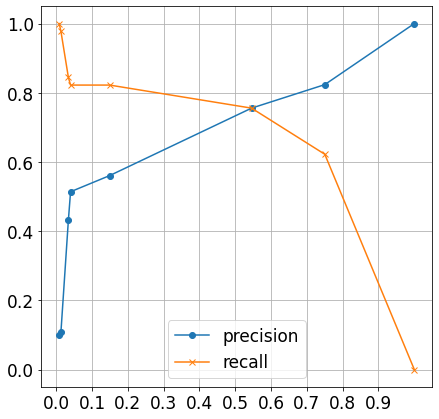

In [147]:
#plotting
plt.figure(figsize=(7,7))
plt.plot(thresholds, precisions, marker='o', label='precision')
plt.plot(thresholds, recalls, marker='x', label='recall')

plt.xticks(np.arange(0, 1, 0.1))
plt.grid(True)

plt.legend()
plt.show()


In [148]:
#Binarizer - 임계값 변경¶

#Binarizer
from sklearn.preprocessing import Binarizer

In [150]:
exam = [[0.3, 0.7, 0.4, 0.6]]

binarizer = Binarizer(threshold=0.7)
binarizer.fit_transform(exam)

array([[0., 0., 0., 0.]])

In [151]:
exam = np.array(exam)
th=0.5
np.where(exam<=th, 0, 1)

array([[0, 1, 0, 1]])

In [152]:
#모델 예측 결과에 적용
binarizer1 = Binarizer(threshold=0.1)
binarizer2 = Binarizer(threshold=0.4)
pred_proba = tree.predict_proba(X_test)

pred_test_tree2 = binarizer1.fit_transform(pred_proba)[:,1]
pred_test_tree3 = binarizer2.fit_transform(pred_proba)[:,1]


In [155]:
print(recall_score(y_test, pred_test_tree2), precision_score(y_test, pred_test_tree2))

0.8222222222222222 0.5606060606060606


In [156]:
print(recall_score(y_test, pred_test_tree3), precision_score(y_test, pred_test_tree3))

0.7555555555555555 0.7555555555555555


In [158]:
#x축에 recall y축에 precision
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, average_precision_score

tree_pos = tree.predict_proba(X_test)[:, 1]
rf_pos = rf.predict_proba(X_test)[:, 1]

precision1, recall1, threshold1 = precision_recall_curve(y_test, tree_pos)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, avarage_precision_score

tree_pos = tree.predict_proba(X_test)[:, 1]

In [1]:
###개인

In [2]:
#breast_cancer data 모델링

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
data= load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
X=data.data

In [8]:
y=data.target

# TODO
- breast_cancer data 모델링
1. breast cancer data 로딩 및 
1. train/test set으로 분리
1. 모델링 (DecisionTreeClassifier(max_depth=3), RandomForestClassifier(max_depth=2, n_estimators=200)
1. 평가 (Train/Test set)
    - 평가지표
        - accuracy, recall, precision, f1 score, confusion matrix
        - PR curve 그리고 AP 점수 확인
        - ROC curve 그리고 AUC 점수확인

In [18]:
#데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#모델링
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

tree0 = DecisionTreeClassifier(max_depth=3, random_state=0)
rf0 = RandomForestClassifier(max_depth=2, n_estimators=200, random_state=0)

#학습 #fit으로만
tree0.fit(X_train, y_train)
rf0.fit(X_train, y_train)

#예측
pred_train_tree0 = tree0.predict(X_train)
pred_test_tree0 = tree0.predict(X_test)

pred_train_rf0 = rf0.predict(X_train)
pred_test_rf0 = rf0.predict(X_test)


In [91]:
def my_func(y, pred, title):
    print('정확도:', accuracy_score(y, pred))
    print('재현률:', recall_score(y, pred))
    print('민감도:', precision_score(y,pred))
    print('f1', f1_score(y, pred))

In [29]:
#accuracy, recall, precision, f1 score, confusion matrix
#tree 
print('tree')
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
print(confusion_matrix(y_train, pred_train_tree0))
print('=============================')
print(confusion_matrix(y_test, pred_test_tree0))

print('                                               ')
#rf
print('rf')
print(confusion_matrix(y_train, pred_train_rf0))
print('=============================')
print(confusion_matrix(y_test, pred_test_rf0))


tree
[[154  11]
 [  2 288]]
[[44  3]
 [ 1 66]]
                                               
rf
[[152  13]
 [  5 285]]
[[45  2]
 [ 2 65]]


In [35]:
my_func(y_train, pred_train_tree0, 'tree_train')

정확도: 0.9714285714285714
재현률: 0.993103448275862
민감도: 0.9632107023411371
f1 0.9779286926994907


In [36]:
my_func(y_test, pred_test_tree0, 'tree_test')

정확도: 0.9649122807017544
재현률: 0.9850746268656716
민감도: 0.9565217391304348
f1 0.9705882352941176


In [37]:
my_func(y_train, pred_train_rf0, 'rf_train')

정확도: 0.9604395604395605
재현률: 0.9827586206896551
민감도: 0.9563758389261745
f1 0.9693877551020409


In [38]:
my_func(y_test, pred_test_rf0, 'rf_test')

정확도: 0.9649122807017544
재현률: 0.9701492537313433
민감도: 0.9701492537313433
f1 0.9701492537313433


In [41]:
from sklearn.metrics import classification_report

#test기준
result_tree = classification_report(y_test, pred_test_tree0)
print(result_tree)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        47
           1       0.96      0.99      0.97        67

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [42]:
result_rf =classification_report(y_test, pred_test_rf0)
print(result_rf)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        47
           1       0.97      0.97      0.97        67

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



C:\Users\user\anaconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\user\anaconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


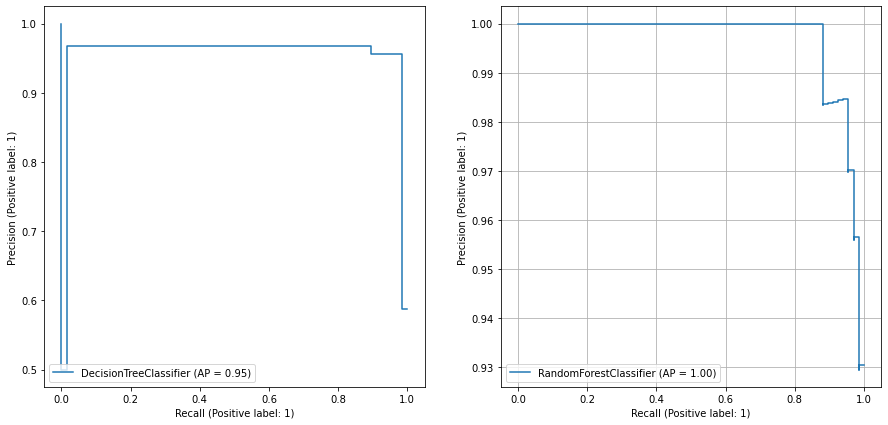

tree_AP: 0.9540839392026359
rf_AP: 0.9966839021235625


In [70]:
#PR curve 그리고 AP 점수 확인
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

pos_proba_tree0 = tree0.predict_proba(X_test)[:, 1]
pos_proba_rf0 = rf0.predict_proba(X_test)[:, 1]

precisions_tree0, recalls_tree0, thresholds_tree0 = precision_recall_curve(y_test, pos_proba_tree0)
precisions_rf0, recalls_rf0, thresholds_rf0 = precision_recall_curve(y_test, pos_proba_rf0)

#PR curve
fig, ax = plt.subplots(1,2, figsize=(15,7))
plot_precision_recall_curve(tree0, X_test, y_test, ax=ax[0])
plot_precision_recall_curve(rf0, X_test, y_test, ax=ax[1])
plt.grid(True)
plt.show()

#AP확인
print('tree_AP:', average_precision_score(y_test, pos_proba_tree0))
print('rf_AP:', average_precision_score(y_test, pos_proba_rf0))


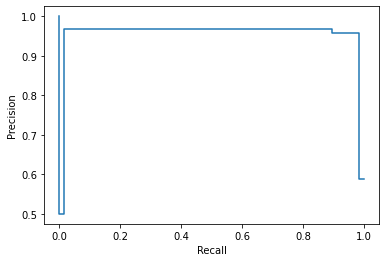

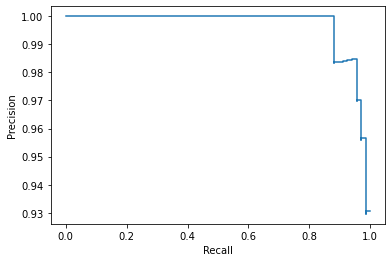

In [58]:
from sklearn.metrics import PrecisionRecallDisplay

disp_tree0 = PrecisionRecallDisplay(precisions_tree0, recalls_tree0)
disp_rf0 = PrecisionRecallDisplay(precisions_rf0, recalls_rf0)

disp_tree0.plot()
disp_rf0.plot()

In [116]:
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

pos_proba_tree0 = tree0.predict_proba(X_test)[:,1]
pos_proba_rf0 = rf0.predict_proba(X_test)[:, 1]

fprs_tree, tprs_tree, thresholds_tree = roc_curve(y_test, pos_proba_tree0)
fprs_rf, tprs_rf, thredholds_rf = roc_curve(y_test, pos_proba_rf0)

#roc score
tree_auc = roc_auc_score(y_test, pos_proba_tree0)
rf_auc = roc_auc_score(y_test, pos_proba_rf0)

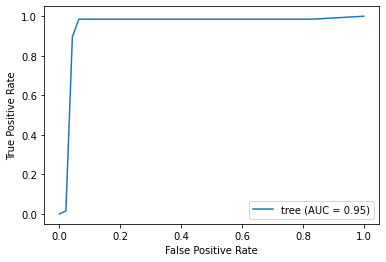

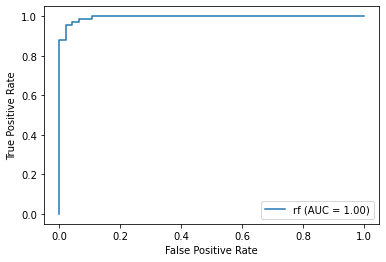

In [117]:
#roc_curve
from sklearn.metrics import RocCurveDisplay

disp1 = RocCurveDisplay(fpr = fprs_tree, tpr=tprs_tree, roc_auc=tree_auc, estimator_name='tree')
disp2 = RocCurveDisplay(fpr = fprs_rf, tpr=tprs_rf, roc_auc=rf_auc, estimator_name='rf')

disp1.plot()
disp2.plot()

In [75]:
#ROC curve 그리고 AUC 점수확인

#두개의 모델 확인하기
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

pos_proba_tree0 = tree0.predict_proba(X_test)[:,1]
pos_proba_rf0 = rf0.predict_proba(X_test)[:,1]

fprs_tree, tprs_tree, thresholds_tree = roc_curve(y_test, pos_proba_tree0)
fprs_rf, tprs_rf, thresholds_rf = roc_curve(y_test, pos_proba_rf0)


print(fprs_tree.shape, tprs_tree.shape, thresholds_tree.shape) 
print(fprs_rf.shape, tprs_rf.shape, thresholds_rf.shape) 

(6,) (6,) (6,)
(20,) (20,) (20,)


In [77]:
import pandas as pd
pd.DataFrame({
    "Threshold":thresholds_tree,
    "FPR": fprs_tree,
    "TPR": tprs_tree
})

,Threshold,FPR,TPR
0,2.000000,0.000000,0.000000
1,1.000000,0.021277,0.014925
2,0.981413,0.042553,0.895522
3,0.684211,0.063830,0.985075
4,0.014599,0.829787,0.985075
5,0.000000,1.000000,1.000000


C:\Users\user\anaconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\user\anaconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


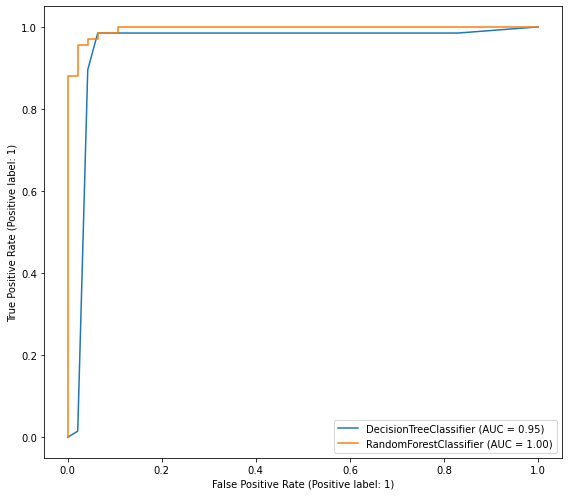

In [80]:
from sklearn.metrics import plot_roc_curve
fig, ax = plt.subplots(1,1, figsize=(8,7))
plot_roc_curve(tree0, X_test, y_test, ax=ax)
plot_roc_curve(rf0, X_test, y_test, ax=ax)

plt.tight_layout()
plt.show()

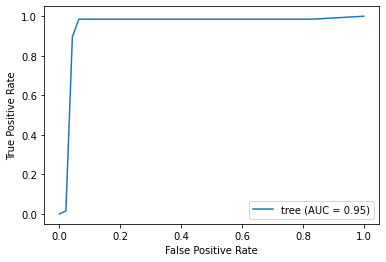

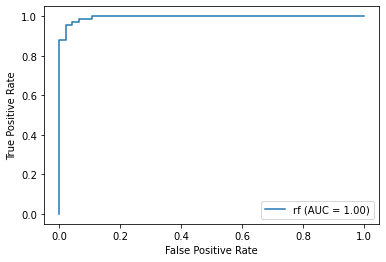

In [86]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay
auc1 = roc_auc_score(y_test, pos_proba_tree0)
auc2 = roc_auc_score(y_test, pos_proba_rf0)

disp1 = RocCurveDisplay(fpr = fprs_tree, tpr=tprs_tree, roc_auc=auc1, estimator_name='tree')
disp1.plot()

disp2 = RocCurveDisplay(fpr = fprs_rf, tpr=tprs_rf, roc_auc=auc2, estimator_name='rf')
disp2.plot()

In [90]:
#roc score
from sklearn.metrics import roc_auc_score

roc_auc_tree = roc_auc_score(y_test, pos_proba_tree0)
roc_auc_rf = roc_auc_score(y_test, pos_proba_rf0)

print(roc_auc_tree)
print(roc_auc_rf)

0.9533185138139092
0.9952365830422356
